In [104]:
import numpy as np
import pandas as pd

In [105]:
df = pd.read_csv("Job_Placement_Data2.csv")
df.head()

,Gender,SSC_percentage,HSC_percentage,fe_cgpa,se_cgpa,te_cgpa,be_cgpa,Agg_percentage,Work_Experience,No_of_Internships,status
0,M,90.00,88.00,8.08,7.09,8.00,8.76,7.98,YES,1,Placed
1,M,95.00,95.00,9.00,8.00,9.05,8.06,8.52,YES,2,Placed
2,M,92.33,98.00,9.09,9.01,9.10,9.90,9.27,YES,2,Placed
3,M,75.33,72.33,7.07,7.66,8.05,7.00,7.44,YES,1,Placed
4,M,90.33,86.21,8.56,8.65,7.05,7.66,7.98,YES,2,Placed


# 1 Preprocessing

In [106]:
df.shape

(119, 11)

In [107]:
df.isnull().sum()

Gender               0
SSC_percentage       0
HSC_percentage       0
fe_cgpa              0
se_cgpa              0
te_cgpa              0
be_cgpa              0
Agg_percentage       0
Work_Experience      0
No_of_Internships    0
status               0
dtype: int64

In [108]:
df.duplicated().sum()

0

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             119 non-null    object 
 1   SSC_percentage     119 non-null    float64
 2   HSC_percentage     119 non-null    float64
 3   fe_cgpa            119 non-null    float64
 4   se_cgpa            119 non-null    float64
 5   te_cgpa            119 non-null    float64
 6   be_cgpa            119 non-null    float64
 7   Agg_percentage     119 non-null    float64
 8   Work_Experience    119 non-null    object 
 9   No_of_Internships  119 non-null    int64  
 10  status             119 non-null    object 
dtypes: float64(7), int64(1), object(3)
memory usage: 10.4+ KB


In [110]:
df['status']

0          Placed
1          Placed
2          Placed
3          Placed
4          Placed
          ...    
114    Not placed
115        Placed
116    Not placed
117    Not placed
118        Placed
Name: status, Length: 119, dtype: object

In [111]:
df.describe()

,SSC_percentage,HSC_percentage,fe_cgpa,se_cgpa,te_cgpa,be_cgpa,Agg_percentage,No_of_Internships
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,77.922689,80.338403,7.334235,7.330924,7.521513,7.593361,7.443613,1.033613
std,14.202733,11.911122,1.179032,1.062369,1.107475,1.143903,0.998292,1.016247
min,44.000000,50.550000,5.400000,5.600000,5.800000,5.560000,5.700000,0.000000
25%,68.150000,73.995000,6.200000,6.400000,6.500000,6.400000,6.535000,0.000000
50%,80.000000,82.000000,7.250000,7.200000,7.440000,7.800000,7.620000,1.000000
75%,89.765000,89.115000,8.325000,8.025000,8.400000,8.425000,8.200000,2.000000
max,99.000000,99.000000,9.650000,9.890000,9.600000,10.000000,9.875000,4.000000


# 2 EDA (Exploratory Data Analysis)

In [112]:
# relationship
corr = df.corr()
corr

,SSC_percentage,HSC_percentage,fe_cgpa,se_cgpa,te_cgpa,be_cgpa,Agg_percentage,No_of_Internships
SSC_percentage,1.000000,0.637467,0.269015,0.069160,0.070964,0.226985,0.176112,0.138783
HSC_percentage,0.637467,1.000000,0.214871,0.009170,0.008780,0.191993,0.125870,0.196322
fe_cgpa,0.269015,0.214871,1.000000,0.667421,0.728448,0.649478,0.866878,0.450603
se_cgpa,0.069160,0.009170,0.667421,1.000000,0.724061,0.633972,0.850867,0.436326
te_cgpa,0.070964,0.008780,0.728448,0.724061,1.000000,0.771790,0.911338,0.457165
be_cgpa,0.226985,0.191993,0.649478,0.633972,0.771790,1.000000,0.866041,0.460122
Agg_percentage,0.176112,0.125870,0.866878,0.850867,0.911338,0.866041,1.000000,0.530777
No_of_Internships,0.138783,0.196322,0.450603,0.436326,0.457165,0.460122,0.530777,1.000000


<AxesSubplot:>

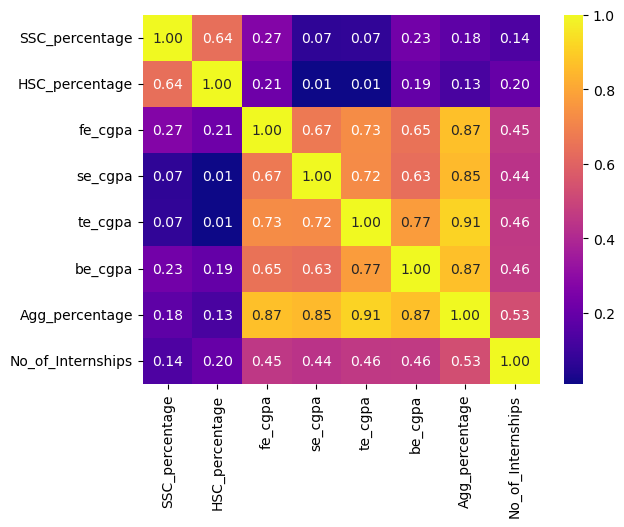

In [113]:
import seaborn as sns
sns.heatmap(corr,cmap='plasma',annot=True,fmt=".2f")

# Plot a histogram of the ssc_percentage column

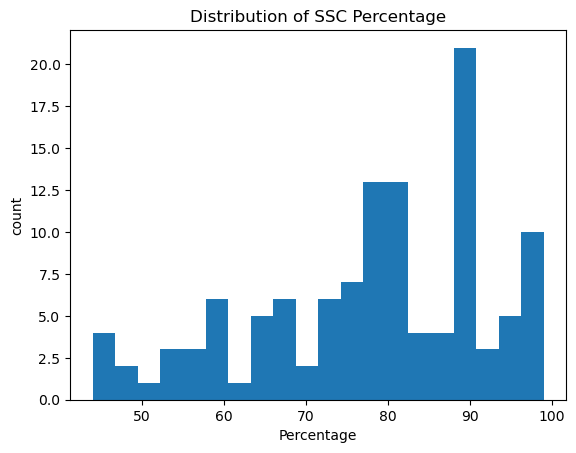

In [114]:
import matplotlib.pyplot as plt
plt.hist(df['SSC_percentage'],bins=20)
plt.title("Distribution of SSC Percentage")
plt.xlabel('Percentage')
plt.ylabel('count')
plt.show()

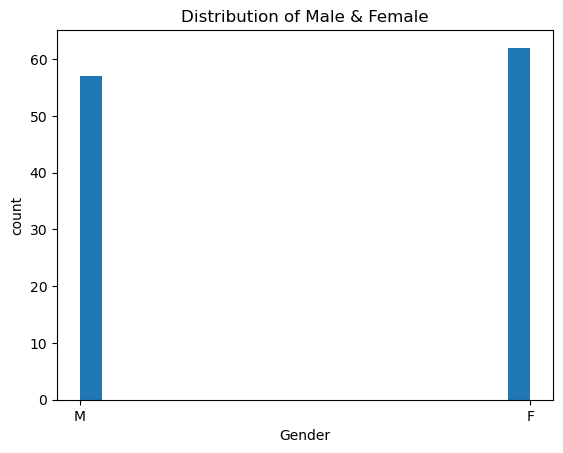

In [115]:
import matplotlib.pyplot as plt
plt.hist(df['Gender'],bins=20)
plt.title("Distribution of Male & Female")
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()


# Plot a scatterplot of ssc_percentage vs. hsc_percentage

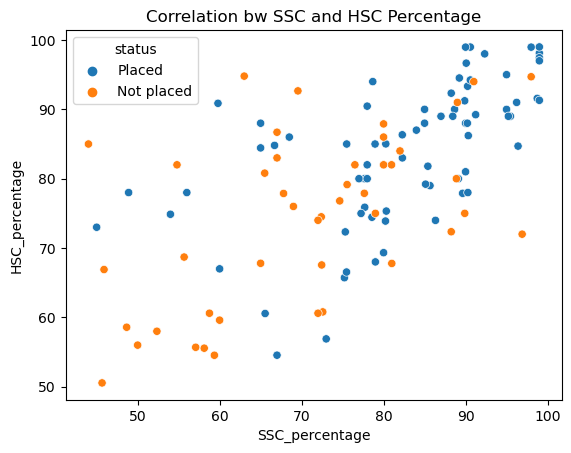

In [116]:
sns.scatterplot(x='SSC_percentage',y='HSC_percentage',data=df,hue='status')
plt.title("Correlation bw SSC and HSC Percentage")
plt.show()

# Plot a scatterplot of ssc_percentage vs. hsc_percentage

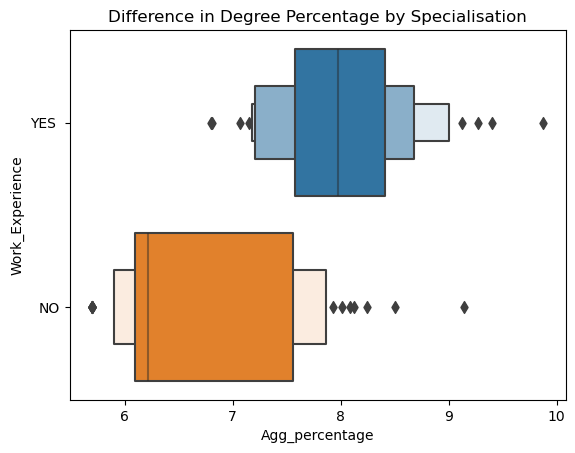

In [118]:
sns.boxenplot(x='Agg_percentage',y='Work_Experience',data=df)
plt.title('Difference in Degree Percentage by Specialisation')
plt.show()

# categorical features into binary/dummy variables

In [119]:
df = pd.get_dummies(df,columns=['Gender', 'Work_Experience', 'status'],drop_first=True)

In [120]:
df

,SSC_percentage,HSC_percentage,fe_cgpa,se_cgpa,te_cgpa,be_cgpa,Agg_percentage,No_of_Internships,Gender_M,Work_Experience_YES,status_Placed
0,90.00,88.00,8.08,7.09,8.00,8.76,7.980,1,1,1,1
1,95.00,95.00,9.00,8.00,9.05,8.06,8.520,2,1,1,1
2,92.33,98.00,9.09,9.01,9.10,9.90,9.270,2,1,1,1
3,75.33,72.33,7.07,7.66,8.05,7.00,7.440,1,1,1,1
4,90.33,86.21,8.56,8.65,7.05,7.66,7.980,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
114,55.67,68.70,6.00,6.20,6.40,6.10,6.175,0,1,0,0
115,56.00,78.00,8.00,8.20,8.40,8.20,8.200,2,1,1,1
116,72.00,74.00,6.20,6.40,6.20,6.10,6.225,0,0,0,0
117,80.00,86.00,6.00,6.20,6.00,5.80,5.975,0,0,0,0


# Train Test Split

In [121]:
X = df.drop('status_Placed',axis=1)
y = df['status_Placed']

In [122]:
print(X.shape,'\n\n',y.shape)

(119, 10) 

 (119,)


In [123]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X_train.shape,'\n\n',X_test.shape)
df

(95, 10) 

 (24, 10)


,SSC_percentage,HSC_percentage,fe_cgpa,se_cgpa,te_cgpa,be_cgpa,Agg_percentage,No_of_Internships,Gender_M,Work_Experience_YES,status_Placed
0,90.00,88.00,8.08,7.09,8.00,8.76,7.980,1,1,1,1
1,95.00,95.00,9.00,8.00,9.05,8.06,8.520,2,1,1,1
2,92.33,98.00,9.09,9.01,9.10,9.90,9.270,2,1,1,1
3,75.33,72.33,7.07,7.66,8.05,7.00,7.440,1,1,1,1
4,90.33,86.21,8.56,8.65,7.05,7.66,7.980,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
114,55.67,68.70,6.00,6.20,6.40,6.10,6.175,0,1,0,0
115,56.00,78.00,8.00,8.20,8.40,8.20,8.200,2,1,1,1
116,72.00,74.00,6.20,6.40,6.20,6.10,6.225,0,0,0,0
117,80.00,86.00,6.00,6.20,6.00,5.80,5.975,0,0,0,0


# Train Logistic Model

In [125]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# comparison between outputs

In [126]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7916666666666666


In [127]:
df.sample(5)

,SSC_percentage,HSC_percentage,fe_cgpa,se_cgpa,te_cgpa,be_cgpa,Agg_percentage,No_of_Internships,Gender_M,Work_Experience_YES,status_Placed
14,95.47,89.00,9.07,6.65,8.35,8.00,8.01,0,0,0,1
62,54.80,82.00,6.00,6.20,6.40,6.20,6.20,0,1,0,0
9,75.22,65.72,7.00,7.00,6.56,6.69,6.81,4,0,1,1
79,59.80,90.87,6.80,7.20,7.60,8.00,7.15,1,1,1,1
12,99.00,98.10,8.98,8.30,7.02,8.55,8.21,1,0,1,1


# Prediction System

In [133]:
import numpy as np
import pickle

# Define input features separately
SSC_percentage = 90.0
HSC_percentage = 88.0
fe_cgpa = 8.08
se_cgpa = 7.09
te_cgpa = 8
be_cgpa = 8.76
Agg_percentage = 7.98
No_of_Internships = 1
Gender = 1
Work_Experience = 1



# Create input data array
input_data = np.array([[SSC_percentage,HSC_percentage,fe_cgpa,se_cgpa,te_cgpa,be_cgpa,Agg_percentage,No_of_Internships,Gender,Work_Experience]])
np_df = np.asarray(input_data)
# Make prediction
pred = lg.predict(input_data)

# Check prediction
if pred[0] == 1:
    print("This person is placed for the job")
else:
    print("This person is not placed for the job")
    
    

pickle.dump(lg,open('placement.pkl','wb'))

This person is placed for the job


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [134]:
df

,SSC_percentage,HSC_percentage,fe_cgpa,se_cgpa,te_cgpa,be_cgpa,Agg_percentage,No_of_Internships,Gender_M,Work_Experience_YES,status_Placed
0,90.00,88.00,8.08,7.09,8.00,8.76,7.980,1,1,1,1
1,95.00,95.00,9.00,8.00,9.05,8.06,8.520,2,1,1,1
2,92.33,98.00,9.09,9.01,9.10,9.90,9.270,2,1,1,1
3,75.33,72.33,7.07,7.66,8.05,7.00,7.440,1,1,1,1
4,90.33,86.21,8.56,8.65,7.05,7.66,7.980,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
114,55.67,68.70,6.00,6.20,6.40,6.10,6.175,0,1,0,0
115,56.00,78.00,8.00,8.20,8.40,8.20,8.200,2,1,1,1
116,72.00,74.00,6.20,6.40,6.20,6.10,6.225,0,0,0,0
117,80.00,86.00,6.00,6.20,6.00,5.80,5.975,0,0,0,0
